In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#### Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [2]:
def get_lower_and_upper_bounds(col, k=1.5):

    #calculate our q1 and q3
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    
    iqr = q3-q1    
    
    #create fence
    lower_fence = q1 - (iqr*k) 
    upper_fence = q3 + (iqr*k) 
    
    return lower_fence, upper_fence

#### Using lemonade.csv dataset and focusing on continuous variables:

In [3]:
url = 'https://gist.githubusercontent.com/ryanorsinger/\
19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.head()

,date,day,temperature,rainfall,flyers,price,sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [8]:
df.date = df.date.astype('datetime64')

In [9]:
df = df.set_index('date')

In [10]:
df.head()

,day,temperature,rainfall,flyers,price,sales
date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          365 non-null    object 
 1   temperature  365 non-null    float64
 2   rainfall     365 non-null    float64
 3   flyers       365 non-null    int64  
 4   price        365 non-null    float64
 5   sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 20.0+ KB


#### Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [12]:
for col in df.columns[1:]:
    print(col)
    
    lower_fence, upper_fence = get_lower_and_upper_bounds( df[col] )
#     print(lower_fence, upper_fence)
    
    print(df[col] [(df[col] < lower_fence)].to_markdown())
    print()

temperature
| date                |   temperature |
|:--------------------|--------------:|
| 2017-12-31 00:00:00 |          15.1 |

rainfall
| date   | rainfall   |
|--------|------------|

flyers
| date                |   flyers |
|:--------------------|---------:|
| 2017-11-21 00:00:00 |      -38 |

price
| date   | price   |
|--------|---------|

sales
| date   | sales   |
|--------|---------|



In [13]:
df.loc['2017-12'].tail()

,day,temperature,rainfall,flyers,price,sales
date,,,,,,
2017-12-27,Wednesday,42.7,1.00,33,0.5,19
2017-12-28,Thursday,37.8,1.25,32,0.5,16
2017-12-29,Friday,39.5,1.25,17,0.5,15
2017-12-30,Saturday,30.9,1.43,22,0.5,13
2017-12-31,Sunday,15.1,2.50,9,0.5,7


#### Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [14]:
for col in df.columns[1:]:
    print(col)
    
    lower_fence, upper_fence = get_lower_and_upper_bounds(df[col])
#     print(lower_fence, upper_fence)
    
    print(df[col] [(df[col] > upper_fence)].to_markdown())
    print()

temperature
| date                |   temperature |
|:--------------------|--------------:|
| 2017-02-11 00:00:00 |           212 |

rainfall
| date                |   rainfall |
|:--------------------|-----------:|
| 2017-01-01 00:00:00 |       2    |
| 2017-01-02 00:00:00 |       1.33 |
| 2017-01-03 00:00:00 |       1.33 |
| 2017-01-06 00:00:00 |       1.54 |
| 2017-01-07 00:00:00 |       1.54 |
| 2017-01-11 00:00:00 |       1.54 |
| 2017-01-12 00:00:00 |       1.33 |
| 2017-01-13 00:00:00 |       1.33 |
| 2017-01-16 00:00:00 |       1.67 |
| 2017-01-17 00:00:00 |       1.43 |
| 2017-01-20 00:00:00 |       1.43 |
| 2017-01-24 00:00:00 |       1.54 |
| 2017-01-28 00:00:00 |       1.33 |
| 2017-01-29 00:00:00 |       1.33 |
| 2017-12-04 00:00:00 |       1.54 |
| 2017-12-05 00:00:00 |       1.82 |
| 2017-12-09 00:00:00 |       1.43 |
| 2017-12-10 00:00:00 |       1.82 |
| 2017-12-12 00:00:00 |       1.33 |
| 2017-12-13 00:00:00 |       1.43 |
| 2017-12-14 00:00:00 |       1.54 |
| 2017-

In [15]:
# df.boxplot()

#### Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [16]:
for col in df.columns[1:]:
    print(col)
    
    lower_fence, upper_fence = get_lower_and_upper_bounds(df[col], 3)
#     print(lower_fence, upper_fence)
    
    print(df[col] [(df[col] < lower_fence)].to_markdown())
    print()

temperature
| date   | temperature   |
|--------|---------------|

rainfall
| date   | rainfall   |
|--------|------------|

flyers
| date                |   flyers |
|:--------------------|---------:|
| 2017-11-21 00:00:00 |      -38 |

price
| date   | price   |
|--------|---------|

sales
| date   | sales   |
|--------|---------|



#### Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [17]:
for col in df.columns[1:]:
    print(col)
    
    lower_fence, upper_fence = get_lower_and_upper_bounds(df[col], 3)
#     print(lower_fence, upper_fence)
    
    print(df[col] [(df[col] > upper_fence)].to_markdown())
    print()

temperature
| date                |   temperature |
|:--------------------|--------------:|
| 2017-02-11 00:00:00 |           212 |

rainfall
| date                |   rainfall |
|:--------------------|-----------:|
| 2017-01-01 00:00:00 |       2    |
| 2017-12-05 00:00:00 |       1.82 |
| 2017-12-10 00:00:00 |       1.82 |
| 2017-12-31 00:00:00 |       2.5  |

flyers
| date   | flyers   |
|--------|----------|

price
| date   | price   |
|--------|---------|

sales
| date                |   sales |
|:--------------------|--------:|
| 2017-07-01 00:00:00 |     143 |
| 2017-07-02 00:00:00 |     158 |
| 2017-07-03 00:00:00 |     235 |
| 2017-07-04 00:00:00 |     534 |



#### Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

In [18]:
df.head()

,day,temperature,rainfall,flyers,price,sales
date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18


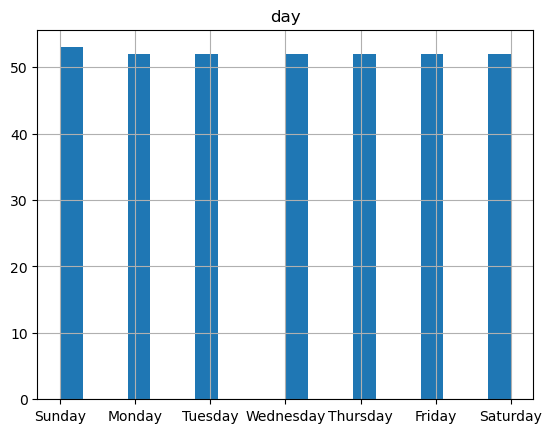

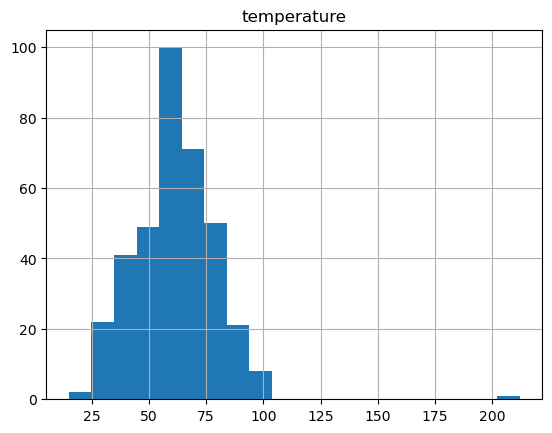

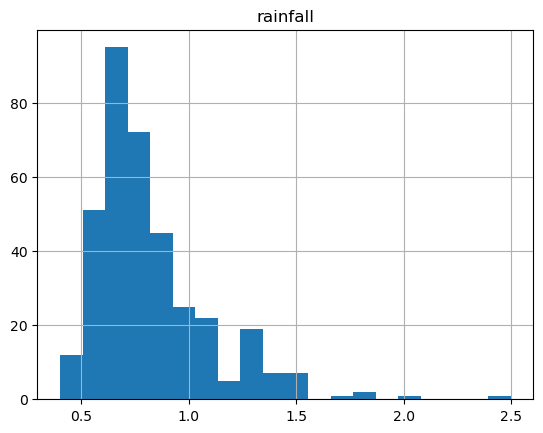

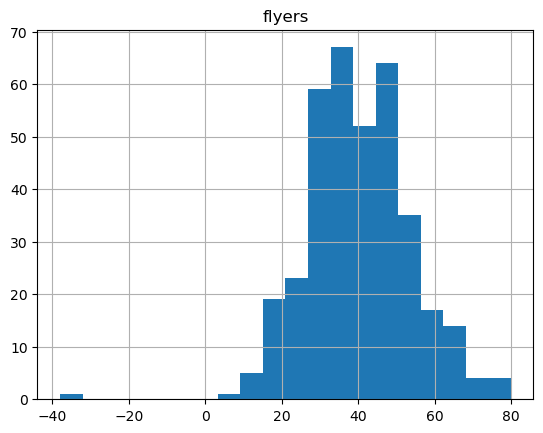

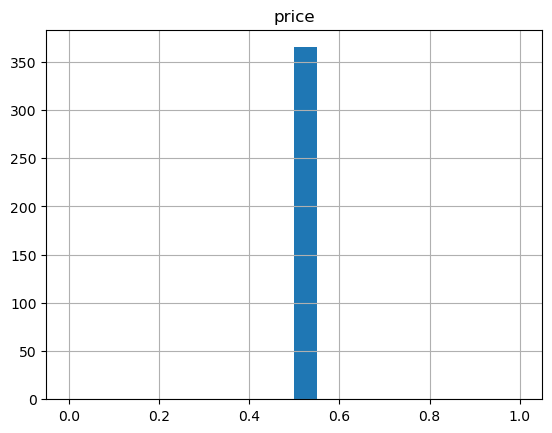

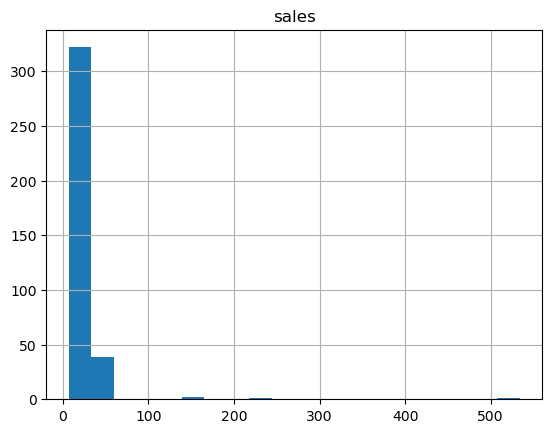

In [23]:
for col in df.columns:
#     print(col)
    df[col].hist(bins=20)
    plt.title(col)
    plt.show()

#### Use a 2 sigma decision rule to isolate the outliers.

In [24]:
df.columns

Index(['day', 'temperature', 'rainfall', 'flyers', 'price', 'sales'], dtype='object')

In [26]:
normals = ['temperature', 'rainfall', 'flyers']
normals

['temperature', 'rainfall', 'flyers']

In [27]:
for col in normals: 
    # Calculate the z-score 
    zscores = pd.Series((df[col] - df[col].mean()) / df[col].std())

    # Finds all of the observations two standard deviations or more.
    print(df[col][zscores.abs() >= 2].to_markdown())
    print()

| date                |   temperature |
|:--------------------|--------------:|
| 2017-02-11 00:00:00 |         212   |
| 2017-06-16 00:00:00 |          99.3 |
| 2017-06-26 00:00:00 |         102.6 |
| 2017-07-01 00:00:00 |         102.9 |
| 2017-07-10 00:00:00 |          98   |
| 2017-07-18 00:00:00 |          99.3 |
| 2017-07-22 00:00:00 |          99.6 |
| 2017-07-27 00:00:00 |          97.9 |
| 2017-12-05 00:00:00 |          22   |
| 2017-12-31 00:00:00 |          15.1 |

| date                |   rainfall |
|:--------------------|-----------:|
| 2017-01-01 00:00:00 |       2    |
| 2017-01-06 00:00:00 |       1.54 |
| 2017-01-07 00:00:00 |       1.54 |
| 2017-01-11 00:00:00 |       1.54 |
| 2017-01-16 00:00:00 |       1.67 |
| 2017-01-17 00:00:00 |       1.43 |
| 2017-01-20 00:00:00 |       1.43 |
| 2017-01-24 00:00:00 |       1.54 |
| 2017-12-04 00:00:00 |       1.54 |
| 2017-12-05 00:00:00 |       1.82 |
| 2017-12-09 00:00:00 |       1.43 |
| 2017-12-10 00:00:00 |       1.82 |
|

#### Do these make sense?

#### Should certain outliers be kept or removed?

#### Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [28]:
for col in normals: 
    # Calculate the z-score 
    zscores = pd.Series((df[col] - df[col].mean()) / df[col].std())

    # Finds all of the observations two standard deviations or more.
    print(df[col][zscores.abs() >= 3].to_markdown())
    print()

| date                |   temperature |
|:--------------------|--------------:|
| 2017-02-11 00:00:00 |           212 |

| date                |   rainfall |
|:--------------------|-----------:|
| 2017-01-01 00:00:00 |       2    |
| 2017-01-16 00:00:00 |       1.67 |
| 2017-12-05 00:00:00 |       1.82 |
| 2017-12-10 00:00:00 |       1.82 |
| 2017-12-31 00:00:00 |       2.5  |

| date                |   flyers |
|:--------------------|---------:|
| 2017-11-21 00:00:00 |      -38 |

